In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from datetime import datetime

import sys
sys.path.append("/home/kieran/code/Ant-mel/legendary_game_recs/")

from preprocessing.preprocess_1_cleaning import *

In [2]:
initial_df = pd.read_csv("../raw_data/all_game_data_v1_corrected2.csv", low_memory=False)

df = cleaning_in_notebook(initial_df)

/home/kieran/code/Ant-mel/legendary_game_recs/preprocessing/preprocess_1_cleaning.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]=pd.to_datetime(df[column])
/home/kieran/code/Ant-mel/legendary_game_recs/preprocessing/preprocess_1_cleaning.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4[string_columns] = make_list_columns_to_lists(df4, string_columns)
/home/kieran/code/Ant-mel/legendary_game_recs/preprocessing/preprocess_1_cleaning.py:91: SettingWithCopyWarning: 
A value is trying 

In [3]:
df.columns

Index(['title', 'release_date', 'plays', 'playing', 'backlogs', 'wishlist',
       'developers', 'avg_review', 'genres', 'platforms', 'description',
       'total_reviews', 'total_lists', 'category', 'main', 'ratings_zero_five',
       'ratings_one_zero', 'ratings_one_five', 'ratings_two_zero',
       'ratings_two_five', 'ratings_three_zero', 'ratings_three_five',
       'ratings_four_zero', 'ratings_four_five', 'ratings_five_zero', 'image',
       'url'],
      dtype='object')

In [4]:
df['year'] = df['release_date'].dt.year

In [5]:
grouped = df.groupby(['year'])

counts = grouped.size()

df_counts = counts.reset_index(name='count')

In [6]:
df_counts.head(30)

,year,count
0,1947,1
1,1950,1
2,1951,1
3,1952,2
4,1954,1
5,1958,1
6,1959,1
7,1962,1
8,1964,1
9,1965,1


In [7]:
df_counts.tail(30)

,year,count
41,1999,1553
42,2000,1603
43,2001,1568
44,2002,1687
45,2003,1542
46,2004,1622
47,2005,1789
48,2006,1872
49,2007,1994
50,2008,2166


<AxesSubplot:xlabel='year', ylabel='count'>

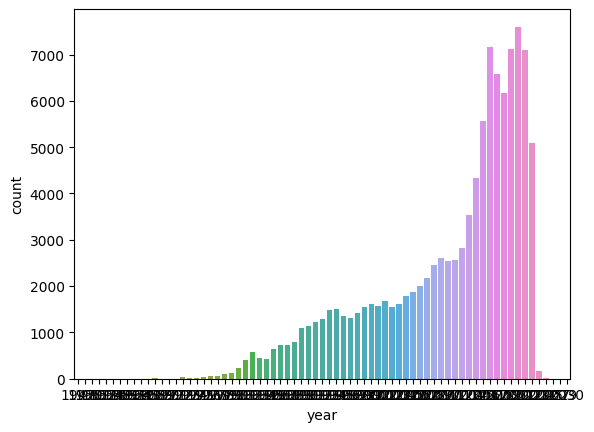

In [8]:
import seaborn as sns

sns.barplot(data = df_counts, x = df_counts['year'], y = df_counts['count'])

In [9]:
df_counts

,year,count
0,1947,1
1,1950,1
2,1951,1
3,1952,2
4,1954,1
...,...,...
66,2024,173
67,2025,19
68,2027,1
69,2029,1


In [10]:
df

,title,release_date,plays,playing,backlogs,wishlist,developers,avg_review,genres,platforms,...,ratings_two_zero,ratings_two_five,ratings_three_zero,ratings_three_five,ratings_four_zero,ratings_four_five,ratings_five_zero,image,url,year
0,PilotXross,2030-12-20,1,0,2,2,[PilotXross],0.0,"[Indie, Racing, Sport]",[SteamVR],...,0,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/pilotxross/,2030
1,Plague Hunter,2029-02-07,0,0,2,7,[],0.0,"[Adventure, Indie]",[Windows PC],...,0,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/plague-hunter/,2029
2,The God Slayer,2027-12-31,0,0,1,8,[Pathea Games],0.0,[RPG],[PlayStation 5],...,0,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/the-god-slayer/,2027
3,Tales of the Death,2025-12-31,0,0,0,4,"[8 Million Bit, Hanoi Studios]",0.0,[],[Windows PC],...,0,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/tales-of-the-d...,2025
4,Riversiders,2025-12-31,1,0,0,0,[],0.0,"[Adventure, Racing]",[Windows PC],...,0,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/riversiders/,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119538,All For Nought: Tic Tac Toe,2020-09-03,0,0,2,0,[],0.0,[Strategy],[Windows PC],...,0,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/all-for-nought...,2020
119548,Siren Head: The Siren's Forest,2020-10-15,4,0,1,0,[],0.0,[Indie],[Windows PC],...,0,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/siren-head-the...,2020
119619,Agent Murphy,2021-01-22,0,1,1,0,[],0.0,"[Adventure, Indie, Simulator]",[Windows PC],...,0,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/agent-murphy/,2021
119625,Escape From Lavender Island,2023-09-01,1,0,4,1,"[Chris Parrello, Jeremy Couillard]",0.0,"[Adventure, Indie, Simulator]","[Windows PC, Linux]",...,0,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/escape-from-la...,2023


In [11]:
def get_decade(year):
    return int(year / 10) * 10

df['decade'] = df['year'].apply(get_decade)

In [12]:
df

,title,release_date,plays,playing,backlogs,wishlist,developers,avg_review,genres,platforms,...,ratings_two_five,ratings_three_zero,ratings_three_five,ratings_four_zero,ratings_four_five,ratings_five_zero,image,url,year,decade
0,PilotXross,2030-12-20,1,0,2,2,[PilotXross],0.0,"[Indie, Racing, Sport]",[SteamVR],...,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/pilotxross/,2030,2030
1,Plague Hunter,2029-02-07,0,0,2,7,[],0.0,"[Adventure, Indie]",[Windows PC],...,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/plague-hunter/,2029,2020
2,The God Slayer,2027-12-31,0,0,1,8,[Pathea Games],0.0,[RPG],[PlayStation 5],...,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/the-god-slayer/,2027,2020
3,Tales of the Death,2025-12-31,0,0,0,4,"[8 Million Bit, Hanoi Studios]",0.0,[],[Windows PC],...,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/tales-of-the-d...,2025,2020
4,Riversiders,2025-12-31,1,0,0,0,[],0.0,"[Adventure, Racing]",[Windows PC],...,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/riversiders/,2025,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119538,All For Nought: Tic Tac Toe,2020-09-03,0,0,2,0,[],0.0,[Strategy],[Windows PC],...,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/all-for-nought...,2020,2020
119548,Siren Head: The Siren's Forest,2020-10-15,4,0,1,0,[],0.0,[Indie],[Windows PC],...,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/siren-head-the...,2020,2020
119619,Agent Murphy,2021-01-22,0,1,1,0,[],0.0,"[Adventure, Indie, Simulator]",[Windows PC],...,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/agent-murphy/,2021,2020
119625,Escape From Lavender Island,2023-09-01,1,0,4,1,"[Chris Parrello, Jeremy Couillard]",0.0,"[Adventure, Indie, Simulator]","[Windows PC, Linux]",...,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/escape-from-la...,2023,2020


In [13]:
dec_grouped = df.groupby(['decade'])
dec_counts = dec_grouped.size()
df_dec_counts = dec_counts.reset_index(name='decade_count')

<AxesSubplot:xlabel='decade', ylabel='decade_count'>

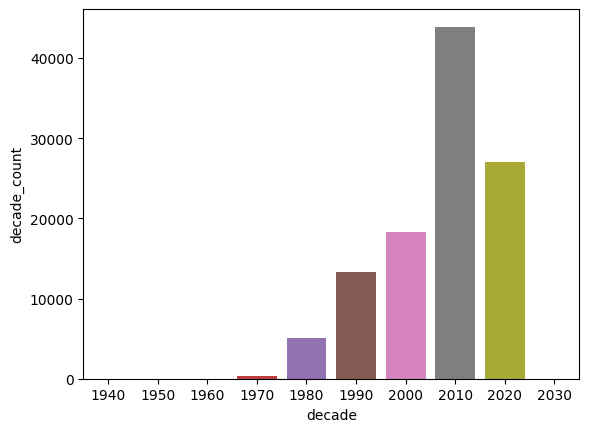

In [14]:
sns.barplot(data = df_dec_counts, x = df_dec_counts['decade'], y = df_dec_counts['decade_count'])

In [15]:
df[df['year'] == 2023].sort_values('plays', ascending=False).head(20)

,title,release_date,plays,playing,backlogs,wishlist,developers,avg_review,genres,platforms,...,ratings_two_five,ratings_three_zero,ratings_three_five,ratings_four_zero,ratings_four_five,ratings_five_zero,image,url,year,decade
2861,The Legend of Zelda: Tears of the Kingdom,2023-05-12,11000,6200,4700,6200,"[Nintendo, Nintendo EPD Production Group No. 3]",4.5,"[Adventure, RPG]",[Nintendo Switch],...,113,287,436,1104,2000,5118,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/the-legend-of-...,2023,2020
4216,Resident Evil 4,2023-03-24,9400,1000,3100,4700,"[Capcom, Capcom Development Division 1]",4.5,"[Adventure, Puzzle, Shooter]","[Windows PC, PlayStation 4, PlayStation 5, Xbo...",...,36,149,317,1271,2139,3542,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/resident-evil-...,2023,2020
5874,Hi-Fi Rush,2023-01-25,6600,1000,3600,3600,"[Bethesda Softworks, Tango Gameworks]",4.3,"[Adventure, Brawler, Music, Platform]","[Windows PC, Xbox Series]",...,93,259,512,1204,1420,1405,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/hi-fi-rush/,2023,2020
5416,Hogwarts Legacy,2023-02-10,5000,1100,2000,2500,"[Avalanche Software, Portkey Games]",3.4,"[Adventure, RPG]","[Windows PC, PlayStation 4, Xbox One, PlayStat...",...,269,546,809,847,329,224,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/hogwarts-legacy/,2023,2020
5807,Dead Space,2023-01-27,3400,318,2400,3000,"[Electronic Arts, Motive Studios]",4.3,"[Adventure, RPG, Shooter]","[Windows PC, PlayStation 5, Xbox Series]",...,21,82,209,573,677,494,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/dead-space--1/,2023,2020
5839,Pizza Tower,2023-01-26,3300,565,2100,2500,[Tour De Pizza],4.4,"[Indie, Platform]",[Windows PC],...,33,72,142,497,671,1018,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/pizza-tower/,2023,2020
5479,Metroid Prime Remastered,2023-02-08,3000,663,2900,2300,"[Nintendo, Retro Studios]",4.4,"[Adventure, Platform, Shooter]",[Nintendo Switch],...,26,86,157,486,576,797,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/metroid-prime-...,2023,2020
5128,Atomic Heart,2023-02-21,2700,262,1500,1600,"[Focus Entertainment, Mundfish]",2.9,"[Adventure, RPG, Shooter]","[Windows PC, PlayStation 4, Xbox One, PlayStat...",...,251,421,407,266,47,47,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/atomic-heart/,2023,2020
3302,Honkai: Star Rail,2023-04-26,2400,1400,327,204,"[miHoYo, HoYoverse]",3.4,"[Adventure, RPG, Turn Based Strategy]","[Windows PC, Android, iOS, PlayStation 5]",...,112,255,353,467,145,126,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/honkai-star-rail/,2023,2020
3222,Star Wars Jedi: Survivor,2023-04-28,2400,410,1900,3100,"[Electronic Arts, Respawn Entertainment]",4.0,[Adventure],"[Windows PC, PlayStation 5, Xbox Series]",...,32,117,260,679,523,218,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/star-wars-jedi...,2023,2020


In [16]:
# gen_one: < 1983
# OG Atari release 1977 - Asteroids, Donkey Kong, Pac-Man
# gen_two: 1983 - 1988
# 1983 release of NES - Mario Brothers, Bomberman, The Legend of Zelda, Castlevania, Metroid, Bubble Bobble, Final Fantasy, Street Fighter
#ge_three: 1989 - 1994
#1989 release of Sega Genesis and GameBoy, later SNES, Personal Computers - Tetris, SimCity, MineSweeper, Solitaire, Sonic the Hedgehog, Lemmings, Super Mario Kart, Mortal Kombat
#gen_four: 1995 -2000
#1995 release of PlayStation, Sega Saturn, 1996 N64 - Rayman, Pokemon, Mario Party, Resident Evil, Tomb Raider, Grand Theft Auto, Legend of Zelda: Ocarina of Time, The Sims
#gen_five: 2001 - 2005
# late 2000 release PS2, 2001 GameCube and Xbox - Halo, Pikmin, Animal Crossing, World of Warcraft, Final Fantasy X, GTA: San Andreas, Super Smash Bro Melee, Fable, Counter-Strike, God Of War
#gen_six: 2006 - 2013
# late 2005 Xbox 360, 2006 PS3, Wii - Wii Sports, Portal, BioShock, Assassin's Creed, Fallout 3, Angry Birds, League of Legends, Plants vs Zombies, Minecraft, Elder Scrolls V: Skyrim, The Last of Us
#gen_seven: 2014 -
# late 2013 PS4 and Xbox One, 2017 Nintendo Switch - Undertale, Witcher 3, Rocket League, Stardew Valley, Overwatch, Pokemon Go, Breath of the Wild, Fortnite, Among Us, Hades, Untitled Goose Game, Animal Crossings: New Horizons, CyberPunk 2077, Elden Ring

#Do we need a gen 8 for recently released/upcoming games?

In [17]:
def get_generation(x):
    if x < 1983:
        return 'Gen 1'
    elif x > 1982 and x <1989:
        return 'Gen 2'
    elif x > 1988 and x < 1995:
        return 'Gen 3'
    elif x > 1994 and x < 2001:
        return 'Gen 4'
    elif x > 2000 and x < 2006:
        return 'Gen 5'
    elif x > 2005 and x < 2014:
        return 'Gen 6'
    elif x > 2013:
        return 'Gen 7'

In [18]:
df['generation'] = df['year'].apply(get_generation)

In [19]:
df.sort_values('plays')

,title,release_date,plays,playing,backlogs,wishlist,developers,avg_review,genres,platforms,...,ratings_three_zero,ratings_three_five,ratings_four_zero,ratings_four_five,ratings_five_zero,image,url,year,decade,generation
79162,Kiniro no Corda 2f Encore,2009-08-20,0,0,0,0,[Koei],0.0,[Visual Novel],[PlayStation Portable],...,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/kiniro-no-cord...,2009,2000,Gen 6
67264,Cold Alley,2013-12-27,0,0,2,0,[],0.0,[Simulator],[Windows PC],...,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/cold-alley/,2013,2010,Gen 6
27693,Nordic Warriors,2020-06-19,0,0,1,0,"[Liron Peer, Mashmashu Studio]",0.0,"[Adventure, Indie, Strategy]",[Windows PC],...,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/nordic-warriors/,2020,2020,Gen 7
27692,Bowling,2020-06-19,0,0,0,0,[Sabec],0.0,"[Arcade, Sport]",[PlayStation 4],...,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/bowling--1/,2020,2020,Gen 7
67273,Mummies Rising,2013-12-26,0,0,0,0,[],0.0,[Shooter],[Xbox 360],...,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/mummies-rising/,2013,2010,Gen 6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83378,Portal,2007-10-10,38000,370,4100,1500,"[Electronic Arts, Valve]",4.1,"[Platform, Puzzle, Shooter]","[Windows PC, Android, Mac, Xbox 360, Linux, Pl...",...,1537,3681,8362,4556,4809,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/portal/,2007,2000,Gen 6
74620,Portal 2,2011-04-18,40000,723,6000,1600,"[Electronic Arts, Valve]",4.4,"[Adventure, Platform, Puzzle, Shooter]","[Windows PC, Mac, Xbox 360, Linux, PlayStation...",...,750,1824,5506,6222,10396,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/portal-2/,2011,2010,Gen 6
68225,Grand Theft Auto V,2013-09-17,42000,1200,4600,895,"[Rockstar North, Rockstar Games]",3.8,"[Adventure, Racing, Shooter]","[Windows PC, Xbox 360, PlayStation 4, PlayStat...",...,3267,5058,7537,4495,3979,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/grand-theft-au...,2013,2010,Gen 6
51512,The Legend of Zelda: Breath of the Wild,2017-03-03,42000,3500,6600,3400,"[Nintendo EPD Production Group No. 3, Nintendo]",4.4,"[Adventure, Puzzle, RPG]","[Wii U, Nintendo Switch]",...,1173,2070,4937,6550,13140,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/the-legend-of-...,2017,2010,Gen 7


In [20]:
df.loc[df['release_date'] > '2023-10-01', 'generation'] = 'Upcoming'

In [21]:
df

,title,release_date,plays,playing,backlogs,wishlist,developers,avg_review,genres,platforms,...,ratings_three_zero,ratings_three_five,ratings_four_zero,ratings_four_five,ratings_five_zero,image,url,year,decade,generation
0,PilotXross,2030-12-20,1,0,2,2,[PilotXross],0.0,"[Indie, Racing, Sport]",[SteamVR],...,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/pilotxross/,2030,2030,Upcoming
1,Plague Hunter,2029-02-07,0,0,2,7,[],0.0,"[Adventure, Indie]",[Windows PC],...,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/plague-hunter/,2029,2020,Upcoming
2,The God Slayer,2027-12-31,0,0,1,8,[Pathea Games],0.0,[RPG],[PlayStation 5],...,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/the-god-slayer/,2027,2020,Upcoming
3,Tales of the Death,2025-12-31,0,0,0,4,"[8 Million Bit, Hanoi Studios]",0.0,[],[Windows PC],...,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/tales-of-the-d...,2025,2020,Upcoming
4,Riversiders,2025-12-31,1,0,0,0,[],0.0,"[Adventure, Racing]",[Windows PC],...,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/riversiders/,2025,2020,Upcoming
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119538,All For Nought: Tic Tac Toe,2020-09-03,0,0,2,0,[],0.0,[Strategy],[Windows PC],...,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/all-for-nought...,2020,2020,Gen 7
119548,Siren Head: The Siren's Forest,2020-10-15,4,0,1,0,[],0.0,[Indie],[Windows PC],...,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/siren-head-the...,2020,2020,Gen 7
119619,Agent Murphy,2021-01-22,0,1,1,0,[],0.0,"[Adventure, Indie, Simulator]",[Windows PC],...,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/agent-murphy/,2021,2020,Gen 7
119625,Escape From Lavender Island,2023-09-01,1,0,4,1,"[Chris Parrello, Jeremy Couillard]",0.0,"[Adventure, Indie, Simulator]","[Windows PC, Linux]",...,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/escape-from-la...,2023,2020,Gen 7


In [22]:
gen_grouped = df.groupby(['generation'])
gen_counts = gen_grouped.size()
df_gen_counts = gen_counts.reset_index(name='generation_count')

<AxesSubplot:xlabel='generation', ylabel='generation_count'>

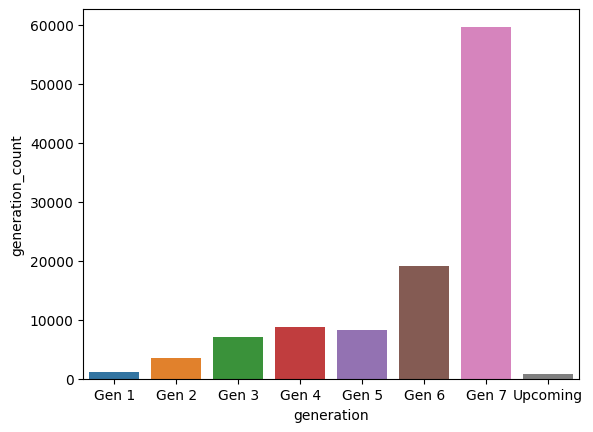

In [23]:
sns.barplot(data = df_gen_counts, x = df_gen_counts['generation'], y = df_gen_counts['generation_count'])

<AxesSubplot:xlabel='year', ylabel='avg_review'>

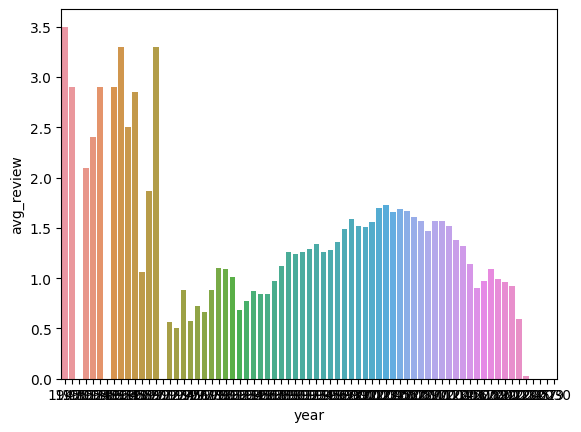

In [28]:
year_avgreview = df.groupby(['year']).mean()[['avg_review']]
sns.barplot(data = year_avgreview, x = year_avgreview.index, y = year_avgreview['avg_review'])

<AxesSubplot:xlabel='decade', ylabel='avg_review'>

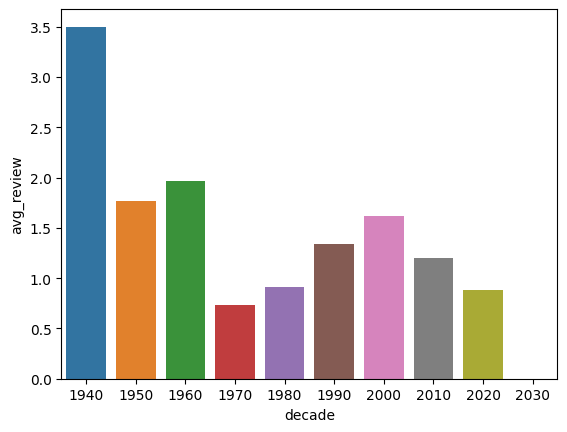

In [29]:
decade_avgreview = df.groupby(['decade']).mean()[['avg_review']]
sns.barplot(data = decade_avgreview, x = decade_avgreview.index, y = decade_avgreview['avg_review'])

<AxesSubplot:xlabel='generation', ylabel='avg_review'>

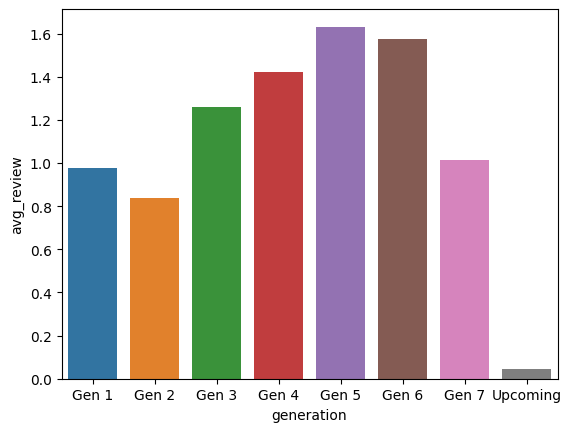

In [30]:
generation_avgreview = df.groupby(['generation']).mean()[['avg_review']]
sns.barplot(data = generation_avgreview, x = generation_avgreview.index, y = generation_avgreview['avg_review'])

In [31]:
df_nozeros = df[df['avg_review'] != 0]

In [32]:
df_nozeros

,title,release_date,plays,playing,backlogs,wishlist,developers,avg_review,genres,platforms,...,ratings_three_zero,ratings_three_five,ratings_four_zero,ratings_four_five,ratings_five_zero,image,url,year,decade,generation
69,Darling Duality: Winter Wish,2024-12-31,7,0,2,2,[Melancholy Marionette],2.2,[Visual Novel],"[Windows PC, Mac, Linux]",...,0,1,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/darling-dualit...,2024,2020,Upcoming
166,Anger Foot,2024-12-31,80,1,82,297,"[Devolver Digital, Robbie Fraser]",3.3,"[Brawler, Indie, Shooter]",[Windows PC],...,13,7,7,2,1,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/anger-foot/,2024,2020,Upcoming
377,Life Is Feudal: MMO,2023-12-31,9,0,5,1,[Long Tale Games],2.4,"[Adventure, RPG, Simulator]",[Windows PC],...,2,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/life-is-feudal...,2023,2020,Upcoming
599,The Making of Karateka,2023-08-29,10,3,9,41,[Digital Eclipse],4.5,"[Adventure, Fighting, Platform]","[Windows PC, PlayStation 4, Xbox One, PlayStat...",...,0,0,2,4,2,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/the-making-of-...,2023,2020,Gen 7
634,Enigma of Fear,2023-12-31,16,0,26,155,[Dumativa Game Studio],2.1,"[Adventure, Indie, Puzzle]",[Windows PC],...,0,0,0,0,4,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/enigma-of-fear/,2023,2020,Upcoming
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118902,Final Crisis: Terrestrial Defense Police,1991-12-01,4,0,1,4,[Techno Grard],3.8,[Shooter],[PC-8801],...,0,2,0,1,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/final-crisis/,1991,1990,Gen 3
119027,Level Up!,2009-11-25,6,0,0,1,[],2.7,"[Adventure, Indie]",[Web browser],...,0,2,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/level-up--1/,2009,2000,Gen 6
119068,Sea Battle,2014-02-07,3,0,0,0,[BYRIL],2.2,[],"[Android, iOS]",...,0,0,1,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/sea-battle--2/,2014,2010,Gen 7
119219,We Are Illuminati,2017-11-02,18,0,0,0,[Tapps Games],2.0,"[Indie, Simulator, Strategy]","[Android, iOS]",...,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/we-are-illumin...,2017,2010,Gen 7


<AxesSubplot:xlabel='year', ylabel='avg_review'>

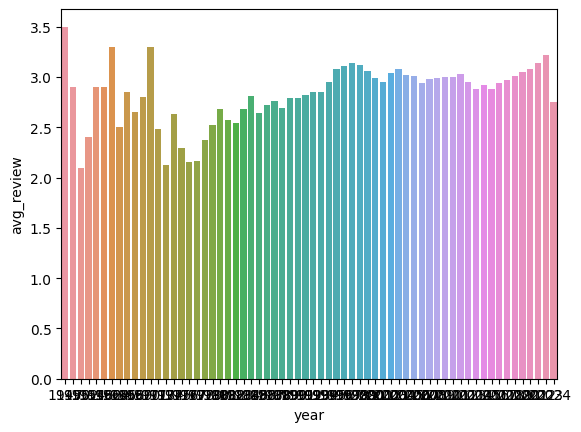

In [33]:
year_avgreview = df_nozeros.groupby(['year']).mean()[['avg_review']]
sns.barplot(data = year_avgreview, x = year_avgreview.index, y = year_avgreview['avg_review'])

<AxesSubplot:xlabel='decade', ylabel='avg_review'>

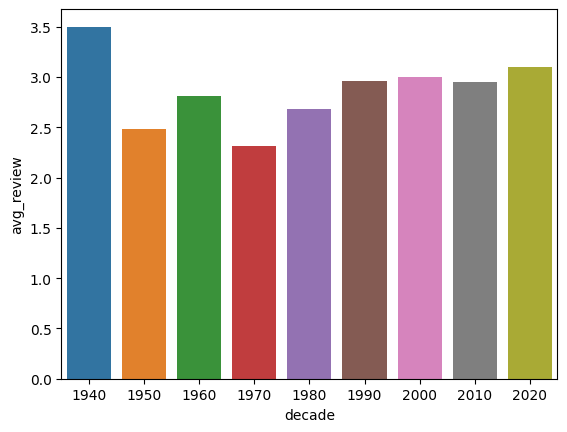

In [34]:
decade_avgreview = df_nozeros.groupby(['decade']).mean()[['avg_review']]
sns.barplot(data = decade_avgreview, x = decade_avgreview.index, y = decade_avgreview['avg_review'])

<AxesSubplot:xlabel='generation', ylabel='avg_review'>

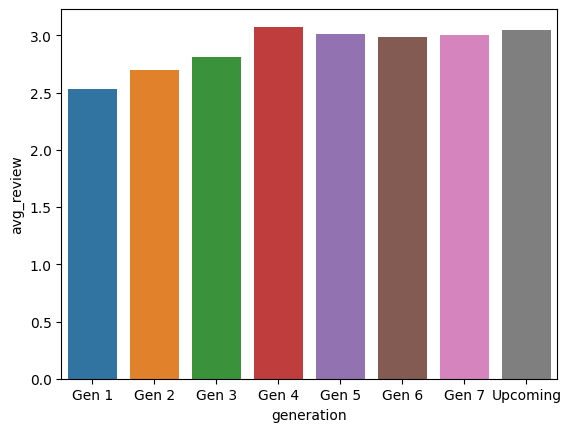

In [35]:
generation_avgreview = df_nozeros.groupby(['generation']).mean()[['avg_review']]
sns.barplot(data = generation_avgreview, x = generation_avgreview.index, y = generation_avgreview['avg_review'])

In [43]:
df_nozeros

,title,release_date,plays,playing,backlogs,wishlist,developers,avg_review,genres,platforms,...,ratings_three_zero,ratings_three_five,ratings_four_zero,ratings_four_five,ratings_five_zero,image,url,year,decade,generation
69,Darling Duality: Winter Wish,2024-12-31,7,0,2,2,[Melancholy Marionette],2.2,[Visual Novel],"[Windows PC, Mac, Linux]",...,0,1,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/darling-dualit...,2024,2020,Upcoming
166,Anger Foot,2024-12-31,80,1,82,297,"[Devolver Digital, Robbie Fraser]",3.3,"[Brawler, Indie, Shooter]",[Windows PC],...,13,7,7,2,1,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/anger-foot/,2024,2020,Upcoming
377,Life Is Feudal: MMO,2023-12-31,9,0,5,1,[Long Tale Games],2.4,"[Adventure, RPG, Simulator]",[Windows PC],...,2,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/life-is-feudal...,2023,2020,Upcoming
599,The Making of Karateka,2023-08-29,10,3,9,41,[Digital Eclipse],4.5,"[Adventure, Fighting, Platform]","[Windows PC, PlayStation 4, Xbox One, PlayStat...",...,0,0,2,4,2,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/the-making-of-...,2023,2020,Gen 7
634,Enigma of Fear,2023-12-31,16,0,26,155,[Dumativa Game Studio],2.1,"[Adventure, Indie, Puzzle]",[Windows PC],...,0,0,0,0,4,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/enigma-of-fear/,2023,2020,Upcoming
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118902,Final Crisis: Terrestrial Defense Police,1991-12-01,4,0,1,4,[Techno Grard],3.8,[Shooter],[PC-8801],...,0,2,0,1,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/final-crisis/,1991,1990,Gen 3
119027,Level Up!,2009-11-25,6,0,0,1,[],2.7,"[Adventure, Indie]",[Web browser],...,0,2,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/level-up--1/,2009,2000,Gen 6
119068,Sea Battle,2014-02-07,3,0,0,0,[BYRIL],2.2,[],"[Android, iOS]",...,0,0,1,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/sea-battle--2/,2014,2010,Gen 7
119219,We Are Illuminati,2017-11-02,18,0,0,0,[Tapps Games],2.0,"[Indie, Simulator, Strategy]","[Android, iOS]",...,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/we-are-illumin...,2017,2010,Gen 7


<AxesSubplot:xlabel='avg_review', ylabel='Count'>

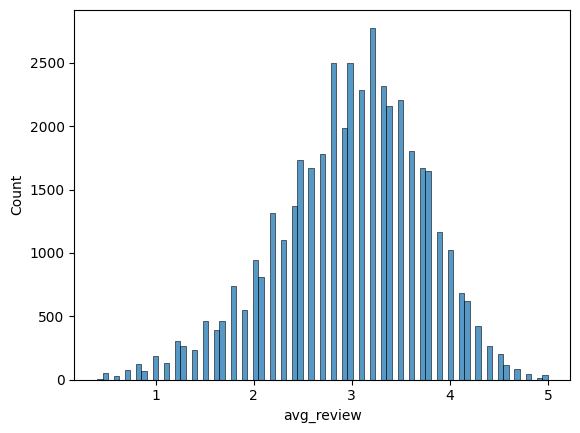

In [44]:
sns.histplot(data = df_nozeros['avg_review'])

<AxesSubplot:xlabel='year', ylabel='count'>

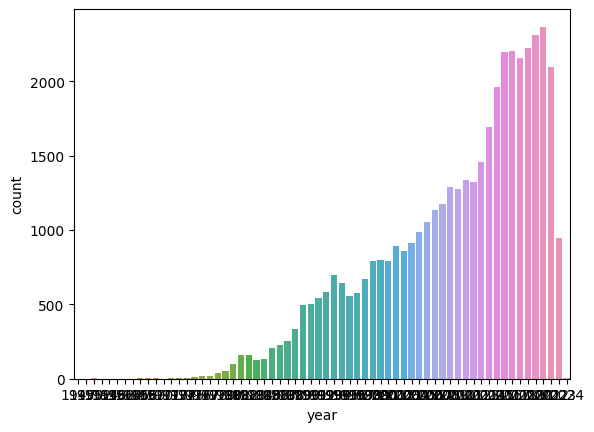

In [46]:
grouped = df_nozeros.groupby(['year'])
counts = grouped.size()
df_nozeros_counts = counts.reset_index(name='count')
sns.barplot(data = df_nozeros_counts, x = df_nozeros_counts['year'], y = df_nozeros_counts['count'])

<AxesSubplot:xlabel='generation', ylabel='generation_count'>

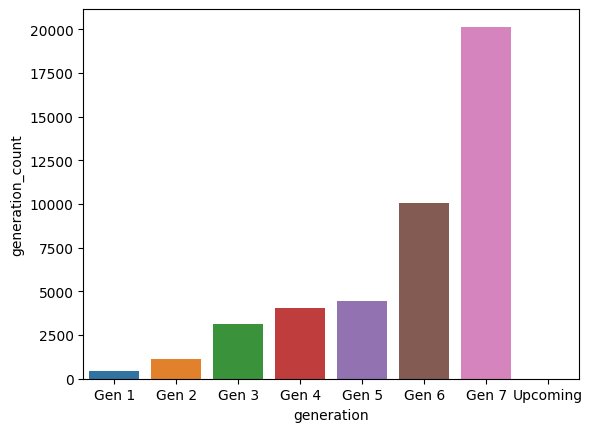

In [47]:
gen_grouped = df_nozeros.groupby(['generation'])
gen_counts = gen_grouped.size()
df_nozeros_gen_counts = gen_counts.reset_index(name='generation_count')
sns.barplot(data = df_nozeros_gen_counts, x = df_nozeros_gen_counts['generation'], y = df_nozeros_gen_counts['generation_count'])